In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch autograd import Variable
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
import numpy as np

import time
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.RandomSizedCrop(224), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5, ))])
}


trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False, download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'forg', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


plane  deer   car  forg


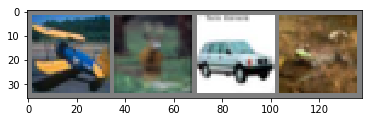

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    npimg = img.numpy().transpose((1, 2, 0))
    npimg = npimg / 2 + 0.5     # unnormalize
    npimg = np.clip(npimg, 0, 1)
    plt.imshow(npimg)


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [7]:
class Net(nn.Module):
    
    def  __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    

net = Net()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [10]:
for epoch in range(4):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Trainning')

[1,  2000] loss: 1.220
[1,  4000] loss: 1.242
[1,  6000] loss: 1.234
[1,  8000] loss: 1.205
[1, 10000] loss: 1.201
[1, 12000] loss: 1.205
[2,  2000] loss: 1.124
[2,  4000] loss: 1.132
[2,  6000] loss: 1.145
[2,  8000] loss: 1.133
[2, 10000] loss: 1.137
[2, 12000] loss: 1.120
[3,  2000] loss: 1.059
[3,  4000] loss: 1.074
[3,  6000] loss: 1.065
[3,  8000] loss: 1.091
[3, 10000] loss: 1.069
[3, 12000] loss: 1.051
[4,  2000] loss: 0.995
[4,  4000] loss: 1.004
[4,  6000] loss: 1.001
[4,  8000] loss: 1.041
[4, 10000] loss: 1.025
[4, 12000] loss: 1.008
Finished Trainning


In [31]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


GroundTruth:    cat  ship  ship plane


In [17]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', '  '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   deer  plane    cat


In [20]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test images:  %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images:  60 %


In [30]:
class_correct = list(0. for i in range(10))
class_total =  list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label]+= c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of  %5s  :  %2d %%'  %   (classes[i], 100*class_correct[i]/class_total[i]))
    

Accuracy of  plane  :  70 %
Accuracy of    car  :  85 %
Accuracy of   bird  :  48 %
Accuracy of    cat  :  39 %
Accuracy of   deer  :  52 %
Accuracy of    dog  :  61 %
Accuracy of   forg  :  71 %
Accuracy of  horse  :  53 %
Accuracy of   ship  :  67 %
Accuracy of  truck  :  56 %


### Training on GPU

In [38]:
net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(4):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.cuda()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Trainning')

[1,  2000] loss: 0.942
[1,  4000] loss: 0.951
[1,  6000] loss: 0.973
[1,  8000] loss: 0.965
[1, 10000] loss: 0.974
[1, 12000] loss: 1.002
[2,  2000] loss: 0.893
[2,  4000] loss: 0.924
[2,  6000] loss: 0.917
[2,  8000] loss: 0.934
[2, 10000] loss: 0.940
[2, 12000] loss: 0.967
[3,  2000] loss: 0.850
[3,  4000] loss: 0.877
[3,  6000] loss: 0.894
[3,  8000] loss: 0.884
[3, 10000] loss: 0.936
[3, 12000] loss: 0.913
[4,  2000] loss: 0.830
[4,  4000] loss: 0.843
[4,  6000] loss: 0.878
[4,  8000] loss: 0.865
[4, 10000] loss: 0.893
[4, 12000] loss: 0.894
Finished Trainning


In [45]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of the network on the 10000 test images:  %d %%' % (100*correct/total))

Accuracy of the network on the 10000 test images:  61 %


In [46]:
class_correct = list(0. for i in range(10))
class_total =  list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label]+= c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of  %5s  :  %2d %%'  %   (classes[i], 100*class_correct[i]/class_total[i]))
    

Accuracy of  plane  :  67 %
Accuracy of    car  :  72 %
Accuracy of   bird  :  50 %
Accuracy of    cat  :  43 %
Accuracy of   deer  :  45 %
Accuracy of    dog  :  41 %
Accuracy of   forg  :  75 %
Accuracy of  horse  :  63 %
Accuracy of   ship  :  82 %
Accuracy of  truck  :  71 %
